# Equipe:Eduardo Fontes,Danyllo Muritiba e Dyego Muritiba

# Observações
Os códigos devem está comentados deixando claro para que serve cada função ou trecho de código usado.

Além disso, é importante explicitar o racionío por trás da construção da resposta, deixando evidente as justificativas para a escolha das funções, representações, simplificações, manipulações e etc, utilizadas.

# Questão 1

Um reator contínuo de tanque agitado, também chamado de CSTR (continuous stirred-tank reactor), é um tipo de reator ideal e comum em engenharia química e modelado através de balanços de massa e energia.

Dada uma reação A → B exotérmica realizada em um CSTR que possui uma camisa por onde passa um fluído refrigerante, através dos balanços de massa energia obtem-se a seguinte representação:
\begin{align}
\begin{cases}
\frac{dC_A(t)}{dt} = -k_0 \cdot C_A(t) \cdot e^{-E_R/T(t)} + \frac{Q_f(t) \cdot C_{Af} - Q \cdot C_A(t)}{a \cdot h(t)} \\
\frac{dT(t)}{dt} = \frac{-k_0 \cdot C_A(t) \cdot \Delta H \cdot e^{-E_R/T(t)}}{\rho C_p} + \frac{Q_f \cdot T_f - Q \cdot T(t)}{a \cdot h(t)} + \frac{U_{a_c} \cdot (T_c(t) - T(t))}{\rho C_p \cdot a \cdot h(t)} \\
\frac{dT_c(t)}{dt} = \frac{Q_c \cdot (T_{cf} - T_c(t))}{V_c} + \frac{U_{a_c} \cdot (T(t) - T_c(t))}{\rho C_{pc} \cdot V_c} \\
\frac{dh(t)}{dt} = \frac{Q_f(t) - Q}{a}
\end{cases}
\end{align}

onde: $a$ = 0.1666 m$^2$, $V_c$ = 0.01 m$^3$, $U_{a_c}$ = 5$\times$10$^4$ J/(min$\cdot$K), $\rho C_p$ = 2.39$\times$10$^5$ J/(m$^3 \cdot $K), $\rho C_{pc}$ = 4.175$\times$10$^6$ J/(m$^3 \cdot $K) \), $k_0$ = 7.2$\times$10$^{10}$ min$^{-1}$, $E_R$ = 8750 K, $\Delta H$ = -5$\times$10$^4$ J/mol, $Q$ = 0.1 m$^3$/min, $C_{Af}$ = 1000 mol/m$^3$, $T_f$ = 320 K, $Q_c$ = 0.015 m$^3$/min, $T_{cf}$ = 300 K, $0 \leq h(t) \leq 2.0$m

## Item 1.1

Avalie o estacionário do sistema para um valor de vazão de alimientação $Q_f(0) = 0.1$ m$^3$/min e $h(0)$ = 1.0 m. Em seguida, simule o comportamento do reator no intervalo de 0 ≤ t ≤ 50 min, aplicando um degrau na vazão de alimentação
$Q_f(t) = \begin{cases}
0.1 & t < 5 \text{ min} \\
0.11 & t \geq 5 \text{ min}
\end{cases}$,
sabendo que o sistema parte do estado estacionário.

Apresente os gráficos de concentração do reagente $C_A(t)$, temperatura interna do reator $T(t)$, temperatura da camisa $T_c(t)$ e nível no interior do CSTR $h(t)$ e discuta os resultados

Convergiu para um estado estacionário satisfatório.
Estado estacionário:
CA = 20.868631906202303, T = 403.93429518057866, Tc = 346.14175146751546, h = 1.0


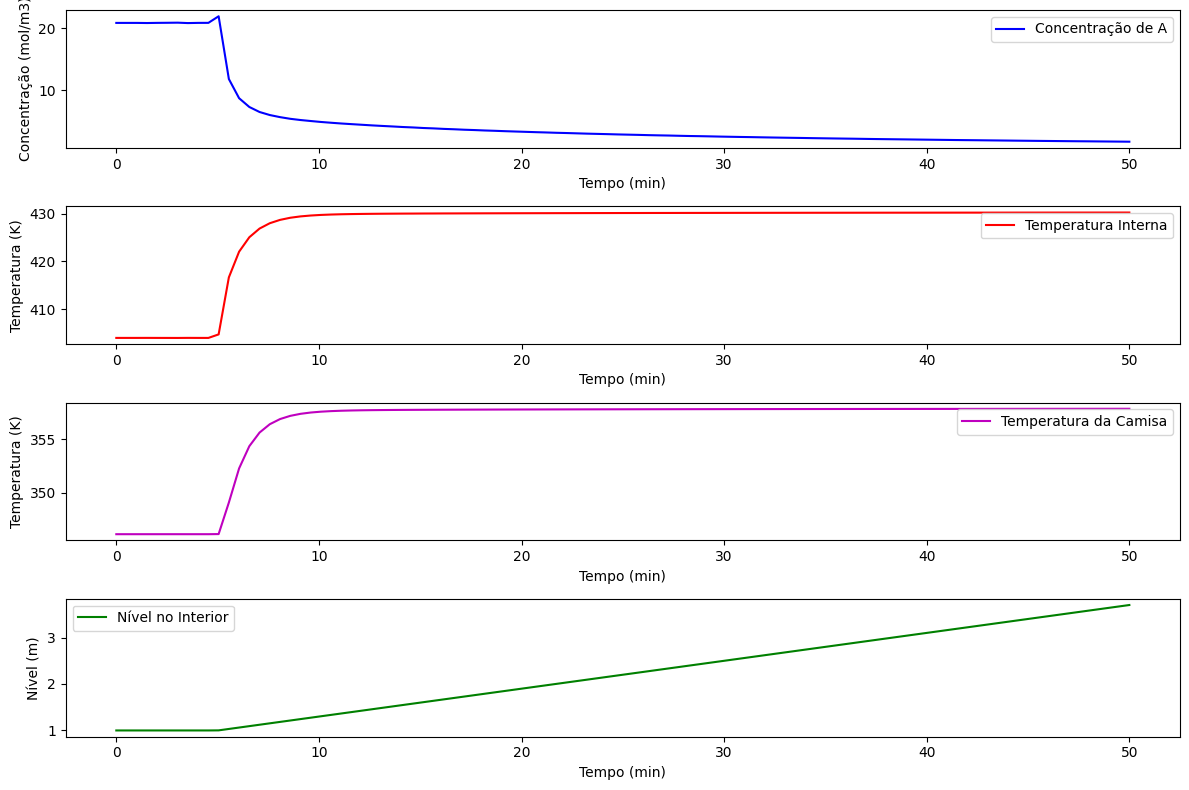

In [5]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

# Definindo as constantes
a = 0.1666
Vc = 0.01
Ua_c = 5e4
rho_Cp = 2.39e5
rho_Cpc = 4.175e6
k0 = 7.2e10
ER = 8750
Delta_H = -5e4
Q = 0.1
CAf = 1000
Tf = 320
Qc = 0.015
Tcf = 300

# Definindo EDOs
def derivada_CA(CA, T, h, Qf):
    return -k0 * CA * np.exp(-ER / T) + (((Qf * CAf) - (Q * CA)) / (a * h))

def derivada_T(T, CA, h, Tc, Qf):
    termo_reacao = (-k0 * CA * Delta_H * np.exp(-ER / T) )/ rho_Cp
    termo_entrada_saida = (Qf * Tf - Q * T) / (a * h)
    termo_troca_calor = Ua_c * (Tc - T) / (rho_Cp * a * h)
    return termo_reacao + termo_entrada_saida + termo_troca_calor

def derivada_Tc(T, Tc):
    termo_entrada_saida = Qc * (Tcf - Tc) / Vc
    termo_troca_calor = Ua_c * (T - Tc) / (rho_Cpc * Vc)
    return termo_entrada_saida + termo_troca_calor

def derivada_h(Qf):
    return (Qf - Q) / a

# Função principal para as EDOs
def edos(t, y):
    CA, T, Tc, h = y
    Qf = 0.1 if t < 5 else 0.11

    dCA = derivada_CA(CA, T, h, Qf)
    dT = derivada_T(T, CA, h, Tc, Qf)
    dTc = derivada_Tc(T, Tc)
    dh = derivada_h(Qf)

    return [dCA, dT, dTc, dh]

# Definindo o estado estacionário
def estado_estacionario(y):
    CA, T, Tc, h = y
    return [derivada_CA(CA, T, h,Qf=0.1), derivada_T(T, CA, h, Tc, 0.1), derivada_Tc(T, Tc), derivada_h(Qf=0.1)]

# Função para atualizar o chute inicial até os valores das derivadas estarem próximos de 0
def atualizar_chute_inicial(chute_inicial, tolerancia=1e-6, max_iter=10000):
    for i in range(max_iter):
        solucao = fsolve(estado_estacionario, chute_inicial)
        residuals = estado_estacionario(solucao)
        erro_max = np.max(np.abs(residuals))
        if erro_max < tolerancia:
            print("Convergiu para um estado estacionário satisfatório.")
            return solucao
        chute_inicial = solucao  # Atualiza o chute inicial com a solução atual
    print("Não convergiu após o número máximo de iterações.")
    print("Erro máximo:", erro_max)
    return solucao

# Condições iniciais
CA0, T0, Tc0, h0 = 20.0, 397.0,340.0, 1.0
chute_inicial = [CA0, T0, Tc0, h0]

# Atualizando o chute inicial até obter um estado estacionário satisfatório
estado_estacionario_sol = atualizar_chute_inicial(chute_inicial)
CAest, Test, Tcest, hest = estado_estacionario_sol

print("Estado estacionário:")
print(f"CA = {CAest}, T = {Test}, Tc = {Tcest}, h = {hest}")

# Aplicação do método solve_ivp para simulação
condicoes_iniciais = [CAest, Test, Tcest, hest]
t = np.linspace(0, 50, 100)
solucao = solve_ivp(edos, [t[0], t[-1]], condicoes_iniciais, t_eval=t)
Ca, T, Tc, h = solucao.y

# Plotando os resultados
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(t, Ca, label='Concentração de A', color='b')
plt.xlabel('Tempo (min)')
plt.ylabel('Concentração (mol/m3)')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(t, T, label='Temperatura Interna', color='r')
plt.xlabel('Tempo (min)')
plt.ylabel('Temperatura (K)')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(t, Tc, label='Temperatura da Camisa', color='m')
plt.xlabel('Tempo (min)')
plt.ylabel('Temperatura (K)')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(t, h, label='Nível no Interior', color='g')
plt.xlabel('Tempo (min)')
plt.ylabel('Nível (m)')
plt.legend()

plt.tight_layout()
plt.show()


## Item 1.2

Para garantir melhor estabilidade do processo e evitar que o nível do tanque $(h(t))$ seque ou transborde é adicionado um controlador cujo o objetivo é manter o nível em um valor desejado (Sp = 1.0 m) manipulando a vazão de descarga $Q(t)$.

O Controlador em questão é o famoso proporcional-integral, representado pela seguinte equação:

\begin{align}
e(t) &= Sp - h(t)\\
Q(t) &= Q(0) + P\left(e(t) + I\int_0^{t} e(t) \right)
\end{align}
onde, $Q(0)$ = 0.1 m$^3$/min, $P$ = -1/6 m$^2$, $I$ = 1.0 min$^{-1}$

Simule o CSTR com o controlador de nível e apresente os gráficos de concentração do reagente $C_A(t)$, temperatura interna do reator $T(t)$, temperatura da camisa $T_c(t)$ e nível no interior do CSTR $h(t)$, comparando com os resultados encontrados no item anterior.

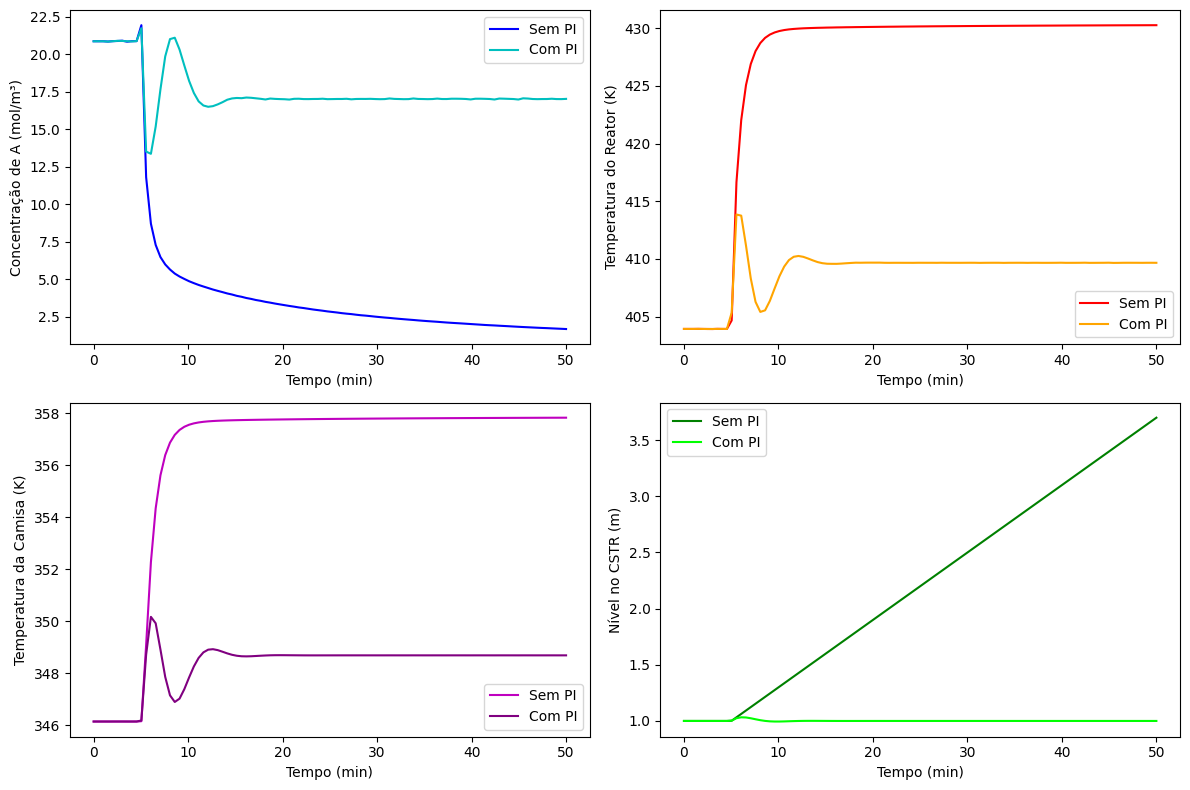

In [6]:

# Constantes do controlador PI
Q0 = 0.1
P = -1/6
I = 1.0

# Definindo as EDOs para o sistema com controlador PI
def edos_controlador(t, y):
    CA, T, Tc, h, integral_e = y

    Qf = 0.1 if t < 5 else 0.11

    # Erro e ação de controle
    Sp = 1.0
    e = Sp - h
    Q_atual = Q0 + P * (e + I * integral_e)

    dCA = -k0 * CA * np.exp(-ER / T) + (Qf * CAf - Q_atual * CA) / (a * h)
    dT = (-k0 * CA * Delta_H * np.exp(-ER / T) / rho_Cp) + ((Qf * Tf - Q_atual * T) / (a * h)) + (Ua_c * (Tc - T) / (rho_Cp * a * h))
    dTc = (Qc * (Tcf - Tc) / Vc) + (Ua_c * (T - Tc) / (rho_Cpc * Vc))
    dh = (Qf - Q_atual) / a
    dintegral_e_dt = e

    return [dCA, dT, dTc, dh, dintegral_e_dt]

# Aplicação do método solve_ivp para simulação com controlador
y0_controlado = [CAest, Test, Tcest, hest, 0]  # A integral do erro começa em 0
sol_controlador = solve_ivp(edos_controlador, [t[0], t[-1]], y0_controlado, t_eval=t)
CA_pi, T_pi, Tc_pi, h_pi, _ = sol_controlador.y

# Gráficos comparativos
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(t, Ca, label='Sem PI', color='b')
plt.plot(t, CA_pi, label='Com PI', color='c')
plt.xlabel('Tempo (min)')
plt.ylabel('Concentração de A (mol/m³)')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(t, T, label='Sem PI', color='r')
plt.plot(t, T_pi, label='Com PI', color='orange')
plt.xlabel('Tempo (min)')
plt.ylabel('Temperatura do Reator (K)')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(t, Tc, label='Sem PI', color='m')
plt.plot(t, Tc_pi, label='Com PI', color='purple')
plt.xlabel('Tempo (min)')
plt.ylabel('Temperatura da Camisa (K)')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(t, h, label='Sem PI', color='g')
plt.plot(t, h_pi, label='Com PI', color='lime')
plt.xlabel('Tempo (min)')
plt.ylabel('Nível no CSTR (m)')
plt.legend()

plt.tight_layout()
plt.show()
